<a href="https://colab.research.google.com/github/SACHINSIROHI47/DataScience_with_Python_Programming_Project/blob/main/Artificial%20Neural%20Network%20(ANN)%20Rain%20Prediction%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Rain Prediction Project: Artificial Neural Networks ANN**
Deep Learning Based Project

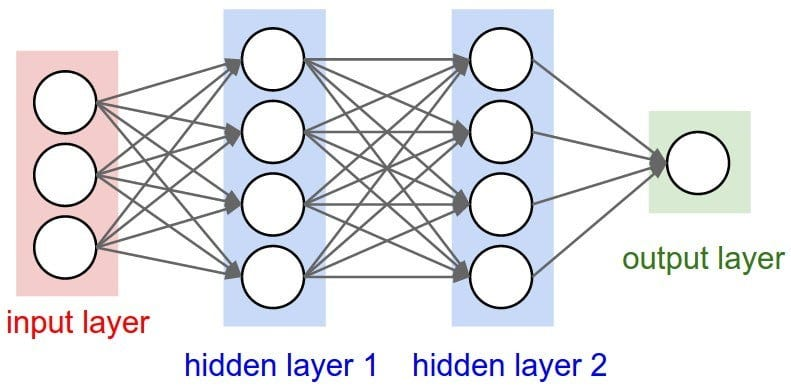

# **What are ANNs?**

Artificial neural networks are one of the main tools used in machine learning. As the “neural” part of their name suggests, they are brain-inspired systems which are intended to replicate the way that we humans learn. Neural networks consist of input and output layers, as well as (in most cases) a hidden layer consisting of units that transform the input into something that the output layer can use. ANNs have three layers that are interconnected. The first layer consists of input neurons. Those neurons send data on to the second layer, which in turn sends the output neurons to the third layer. ANNs are considered non-linear statistical data modeling tools where the complex relationships between inputs and outputs are modeled or patterns are found. Note that a neuron can also be referred to as a perceptron.



# **Artificial Neural Network (ANN):**

ANN is a basic form of neural network where neurons are arranged in layers, typically including an input layer, one or more hidden layers, and an output layer. Each neuron in one layer is connected to every neuron in the next layer, and each connection has a weight associated with it. ANN is suitable for a wide range of tasks, including regression, classification, and pattern recognition. However, ANN may struggle with processing data like images where spatial relationships are important due to its fully connected nature.

## **Convolutional Neural Network (CNN):**

CNN is a specialized type of neural network designed specifically for processing grid-like data, such as images. It utilizes convolutional layers to automatically and adaptively learn spatial hierarchies of features from the input data. CNNs are composed of multiple layers, including convolutional layers, pooling layers, and fully connected layers. CNNs excel at tasks involving image recognition, object detection, and image classification due to their ability to capture spatial patterns and relationships efficiently.

In summary, while both ANN and CNN are neural network architectures, CNNs are particularly well-suited for tasks involving image data due to their ability to extract and learn hierarchical features effectively, whereas ANNs are more general-purpose and can be applied to a wider range of tasks beyond image processing.

# **RAIN PREDICTION TABLE OF CONTENTS**

IMPORTING LIBRARIES

LOADING DATA

DATA VISUALIZATION AND CLEANINGS

DATA PREPROCESSING

MODEL BUILDING

CONCLUSION

END

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization,Dropout,LSTM
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, precision_score, recall_score
from keras.optimizers import Adam

from keras.callbacks import EarlyStopping
from keras import callbacks
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import tensorflow as tf


import warnings
warnings.filterwarnings('ignore')

In [ ]:
# from google.colab import files
# files.upload()

#others
# from google.colab import drive
# drive.mount('')

In [ ]:
data=pd.read_csv('weatherData.csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [ ]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

<Axes: xlabel='RainTomorrow', ylabel='count'>

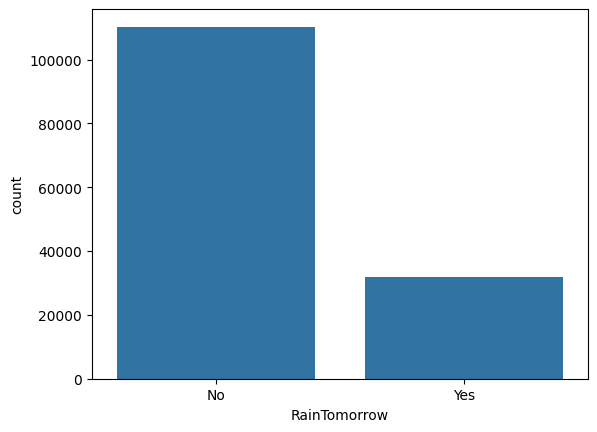

In [ ]:
sns.countplot(x=data['RainTomorrow'])

In [ ]:
float_columns=data.select_dtypes(include=['float64'])
print(float_columns.columns)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RISK_MM'],
      dtype='object')


In [ ]:
data2=float_columns
data2.dtypes

,0
MinTemp,float64
MaxTemp,float64
Rainfall,float64
Evaporation,float64
Sunshine,float64
WindGustSpeed,float64
WindSpeed9am,float64
WindSpeed3pm,float64
Humidity9am,float64
Humidity3pm,float64


In [ ]:
data2.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,1.0
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.2


<Axes: >

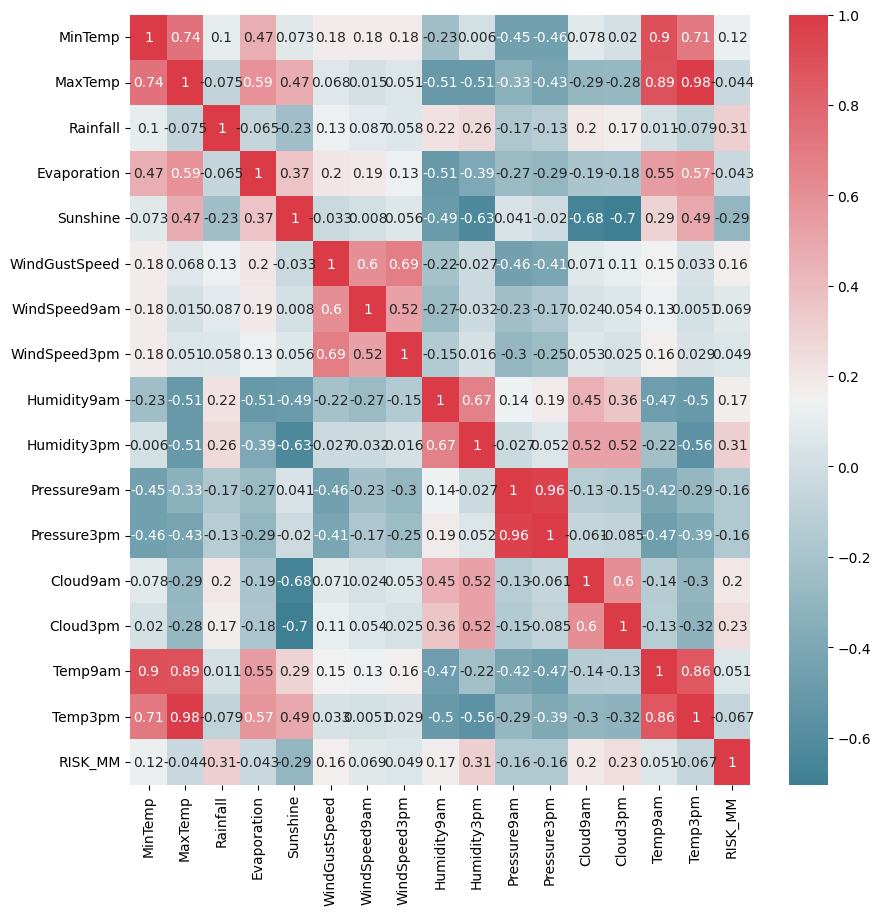

In [ ]:
#Correlation
corr=data2.corr()
cormp=sns.diverging_palette(220,10,as_cmap=True)
plt.figure(figsize=(10,10))
sns.heatmap(corr,cmap=cormp,annot=True)

In [ ]:
data['Date']=pd.to_datetime(data['Date'])
data['Year']=data['Date'].dt.year
data['Month']=data['Date'].dt.month

#I will use neural network use months into cyclic continous
def encode(data,col,max_val):
  data[col+'_sin']=np.sin(2*np.pi*data[col]/max_val)
  data[col+'_cos']=np.cos(2*np.pi*data[col]/max_val)
  return data

data['Month']=data.Date.dt.month
data=encode(data,'Month',12)

data['Day']=data.Date.dt.day
day=encode(data,'Day',31)

data.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,RainToday,RISK_MM,RainTomorrow,Year,Month,Month_sin,Month_cos,Day,Day_sin,Day_cos
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,No,0.0,No,2008,12,-2.449294e-16,1.0,1,0.201299,0.979530
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,No,0.0,No,2008,12,-2.449294e-16,1.0,2,0.394356,0.918958
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,No,0.0,No,2008,12,-2.449294e-16,1.0,3,0.571268,0.820763
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,No,1.0,No,2008,12,-2.449294e-16,1.0,4,0.724793,0.688967
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,No,0.2,No,2008,12,-2.449294e-16,1.0,5,0.848644,0.528964


Text(0, 0.5, 'Days')

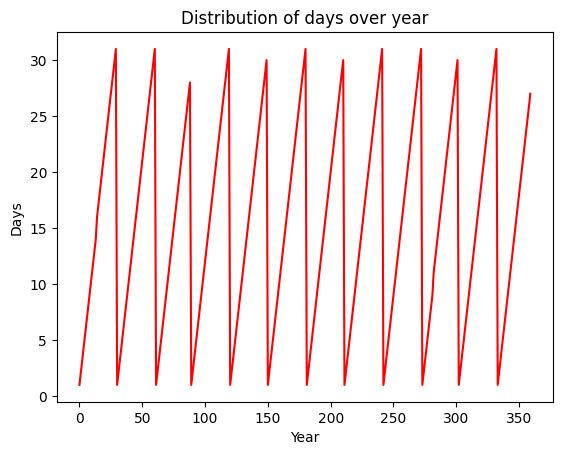

In [ ]:
section=data[:360]
tm=section["Day"].plot(color='red')
tm.set_title("Distribution of days over year")
tm.set_xlabel("Year")
tm.set_ylabel("Days")


In [ ]:
data.columns
#

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow', 'Year', 'Month',
       'Month_sin', 'Month_cos', 'Day', 'Day_sin', 'Day_cos'],
      dtype='object')

Text(0.5, 0, 'Sine Encoded Day')

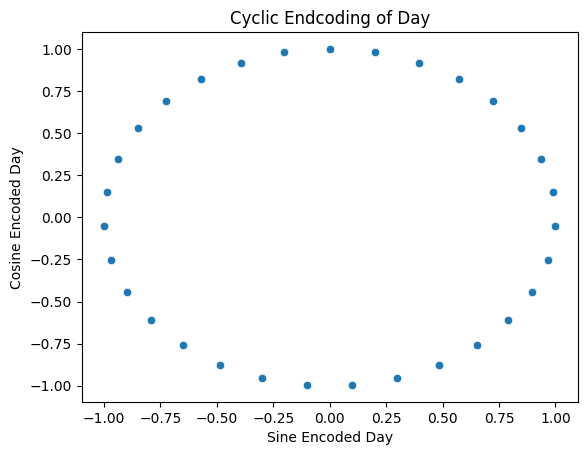

In [ ]:
c_month=sns.scatterplot(x='Day_sin',y='Day_cos',data=data)
c_month.set_title("Cyclic Endcoding of Day")
c_month.set_ylabel("Cosine Encoded Day")
c_month.set_xlabel("Sine Encoded Day")

In [ ]:
#get Categorical Values
s=(data.dtypes=='object')
object_cols=list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [ ]:
#Check Missing values
for a in object_cols:
  print(a,data[a].isnull().sum())

Location 0
WindGustDir 9330
WindDir9am 10013
WindDir3pm 3778
RainToday 1406
RainTomorrow 0


In [ ]:
#fill the missing values
for a in object_cols:
  data[a].fillna(data[a].mode()[0],inplace=True)


In [ ]:
#get the list of numeric values
s=(data.dtypes=='float64')
float_cols=list(s[s].index)

print("Numeric variables:")
print(float_cols)
#

Numeric variables:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM', 'Month_sin', 'Month_cos', 'Day_sin', 'Day_cos']


In [ ]:
#missing numeric null values
for a in float_cols:
  print(a,data[a].isnull().sum())

MinTemp 637
MaxTemp 322
Rainfall 1406
Evaporation 60843
Sunshine 67816
WindGustSpeed 9270
WindSpeed9am 1348
WindSpeed3pm 2630
Humidity9am 1774
Humidity3pm 3610
Pressure9am 14014
Pressure3pm 13981
Cloud9am 53657
Cloud3pm 57094
Temp9am 904
Temp3pm 2726
RISK_MM 0
Month_sin 0
Month_cos 0
Day_sin 0
Day_cos 0


In [ ]:
#fill the missing values
for i in float_cols:
  data[i].fillna(data[i].median(),inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 31 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  object        
 2   MinTemp        142193 non-null  float64       
 3   MaxTemp        142193 non-null  float64       
 4   Rainfall       142193 non-null  float64       
 5   Evaporation    142193 non-null  float64       
 6   Sunshine       142193 non-null  float64       
 7   WindGustDir    142193 non-null  object        
 8   WindGustSpeed  142193 non-null  float64       
 9   WindDir9am     142193 non-null  object        
 10  WindDir3pm     142193 non-null  object        
 11  WindSpeed9am   142193 non-null  float64       
 12  WindSpeed3pm   142193 non-null  float64       
 13  Humidity9am    142193 non-null  float64       
 14  Humidity3pm    142193 non-null  float64       
 15  

In [ ]:
data['year']=data['Year']
yearWise_Rainfall=data.groupby('year')['Rainfall'].sum().reset_index()
yearWise_Rainfall

,year,Rainfall
0,2007,196.4
1,2008,5141.2
2,2009,35652.5
3,2010,43828.6
4,2011,42163.4
5,2012,35825.5
6,2013,36108.3
7,2014,33603.3
8,2015,36492.7
9,2016,41154.5


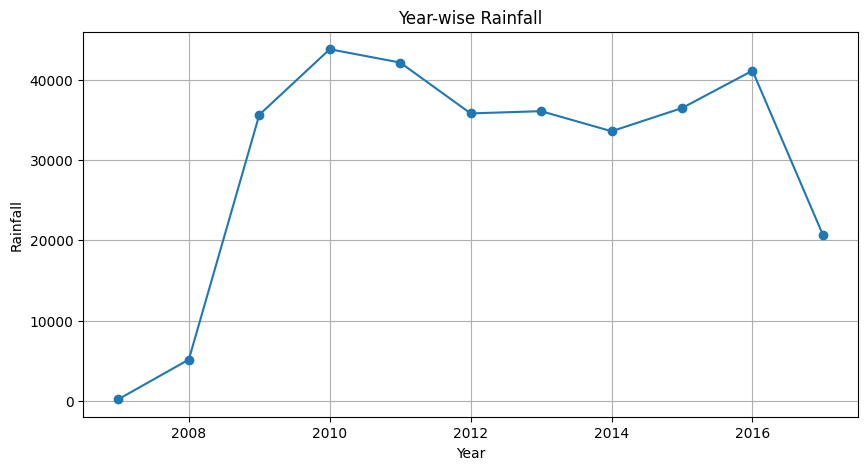

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(yearWise_Rainfall['year'],yearWise_Rainfall['Rainfall'],marker='o')
plt.xlabel('Year')
plt.ylabel('Rainfall')
plt.title('Year-wise Rainfall')
plt.grid(True)
plt.show()

In [ ]:
#Apply label encoder to each column with Categroical Data
label_encoder=LabelEncoder()
for i in object_cols:
  data[i]=label_encoder.fit_transform(data[i])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 32 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  int64         
 2   MinTemp        142193 non-null  float64       
 3   MaxTemp        142193 non-null  float64       
 4   Rainfall       142193 non-null  float64       
 5   Evaporation    142193 non-null  float64       
 6   Sunshine       142193 non-null  float64       
 7   WindGustDir    142193 non-null  int64         
 8   WindGustSpeed  142193 non-null  float64       
 9   WindDir9am     142193 non-null  int64         
 10  WindDir3pm     142193 non-null  int64         
 11  WindSpeed9am   142193 non-null  float64       
 12  WindSpeed3pm   142193 non-null  float64       
 13  Humidity9am    142193 non-null  float64       
 14  Humidity3pm    142193 non-null  float64       
 15  

In [ ]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,RISK_MM,RainTomorrow,Year,Month,Month_sin,Month_cos,Day,Day_sin,Day_cos,year
0,2008-12-01,2,13.4,22.9,0.6,4.8,8.5,13,44.0,13,...,0.0,0,2008,12,-2.449294e-16,1.0,1,0.201299,0.979530,2008
1,2008-12-02,2,7.4,25.1,0.0,4.8,8.5,14,44.0,6,...,0.0,0,2008,12,-2.449294e-16,1.0,2,0.394356,0.918958,2008
2,2008-12-03,2,12.9,25.7,0.0,4.8,8.5,15,46.0,13,...,0.0,0,2008,12,-2.449294e-16,1.0,3,0.571268,0.820763,2008
3,2008-12-04,2,9.2,28.0,0.0,4.8,8.5,4,24.0,9,...,1.0,0,2008,12,-2.449294e-16,1.0,4,0.724793,0.688967,2008
4,2008-12-05,2,17.5,32.3,1.0,4.8,8.5,13,41.0,1,...,0.2,0,2008,12,-2.449294e-16,1.0,5,0.848644,0.528964,2008


In [ ]:
#Preparing attribute of scale the data
features=data.drop(['RainTomorrow','Date','Day','Month'],axis=1)

In [ ]:
features.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month_sin,Month_cos,Day_sin,Day_cos,year
0,2,13.4,22.9,0.6,4.8,8.5,13,44.0,13,14,...,16.9,21.8,0,0.0,2008,-2.449294e-16,1.0,0.201299,0.979530,2008
1,2,7.4,25.1,0.0,4.8,8.5,14,44.0,6,15,...,17.2,24.3,0,0.0,2008,-2.449294e-16,1.0,0.394356,0.918958,2008
2,2,12.9,25.7,0.0,4.8,8.5,15,46.0,13,15,...,21.0,23.2,0,0.0,2008,-2.449294e-16,1.0,0.571268,0.820763,2008
3,2,9.2,28.0,0.0,4.8,8.5,4,24.0,9,0,...,18.1,26.5,0,1.0,2008,-2.449294e-16,1.0,0.724793,0.688967,2008
4,2,17.5,32.3,1.0,4.8,8.5,13,41.0,1,7,...,17.8,29.7,0,0.2,2008,-2.449294e-16,1.0,0.848644,0.528964,2008


StandardScaler is a versatile and widely used preprocessing technique that contributes to the robustness, interpretability, and performance of machine learning models trained on diverse datasets.

**Standardize features by removing the mean and scaling to unit variance**

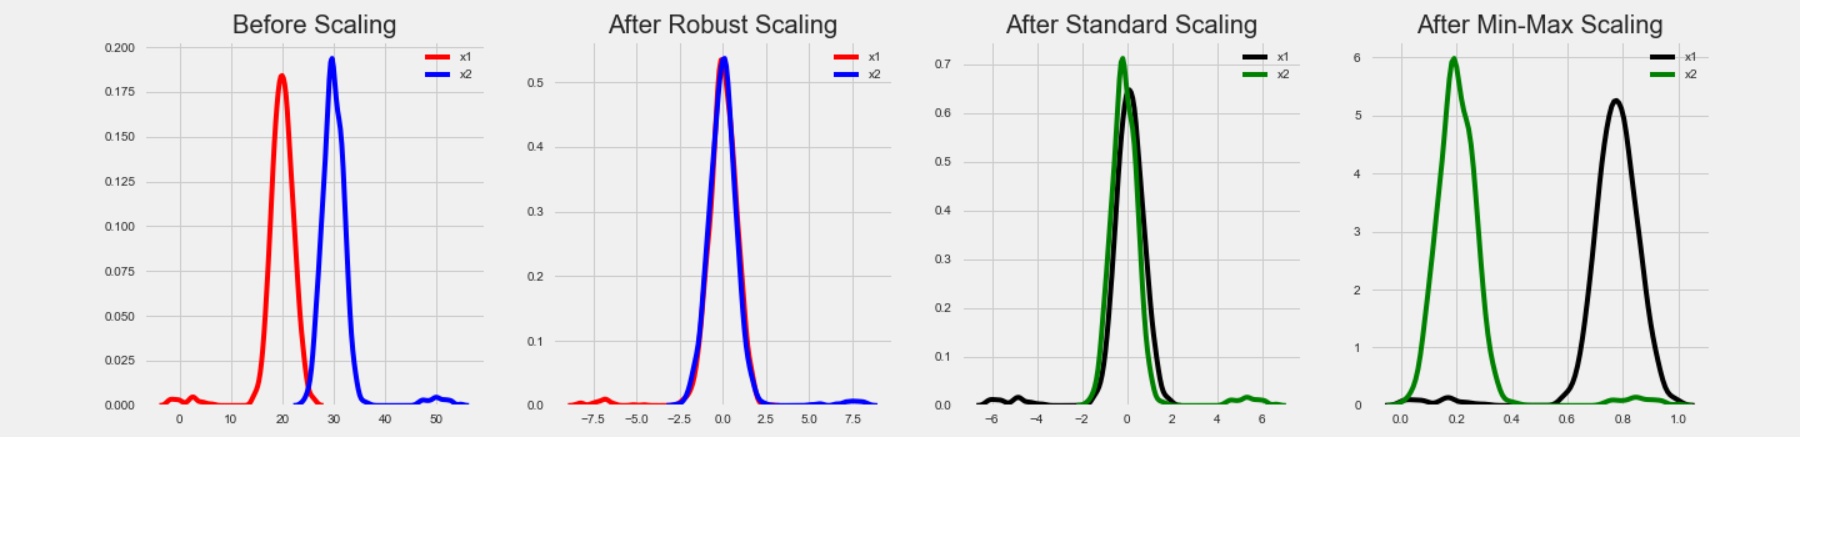

In [ ]:
target=data['RainTomorrow']

#Standard Scaler for the features
col_names=list(features.columns)
std_scaler=preprocessing.StandardScaler()
features=std_scaler.fit_transform(features)

features=pd.DataFrame(features,columns=col_names)
features.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month_sin,Month_cos,Day_sin,Day_cos,year
0,-1.527004,0.190085,-0.045764,-0.204920,-0.120303,0.16528,1.052556,0.310479,1.328933,1.366277,...,-0.013238,0.018050,-0.532962,-0.278450,-1.872674,-0.015522,1.434209,0.279183,1.424824,-1.872674
1,-1.527004,-0.749042,0.263677,-0.276125,-0.120303,0.16528,1.265582,0.310479,-0.221571,1.586236,...,0.033114,0.381886,-0.532962,-0.278450,-1.872674,-0.015522,1.434209,0.549895,1.338386,-1.872674
2,-1.527004,0.111824,0.348070,-0.276125,-0.120303,0.16528,1.478609,0.462679,1.328933,1.586236,...,0.620242,0.221798,-0.532962,-0.278450,-1.872674,-0.015522,1.434209,0.797968,1.198260,-1.872674
3,-1.527004,-0.467304,0.671577,-0.276125,-0.120303,0.16528,-0.864683,-1.211523,0.442931,-1.713146,...,0.172171,0.702062,-0.532962,-0.160497,-1.872674,-0.015522,1.434209,1.013246,1.010182,-1.872674
4,-1.527004,0.831821,1.276393,-0.157450,-0.120303,0.16528,1.052556,0.082179,-1.329073,-0.173434,...,0.125818,1.167773,-0.532962,-0.254859,-1.872674,-0.015522,1.434209,1.186915,0.781853,-1.872674


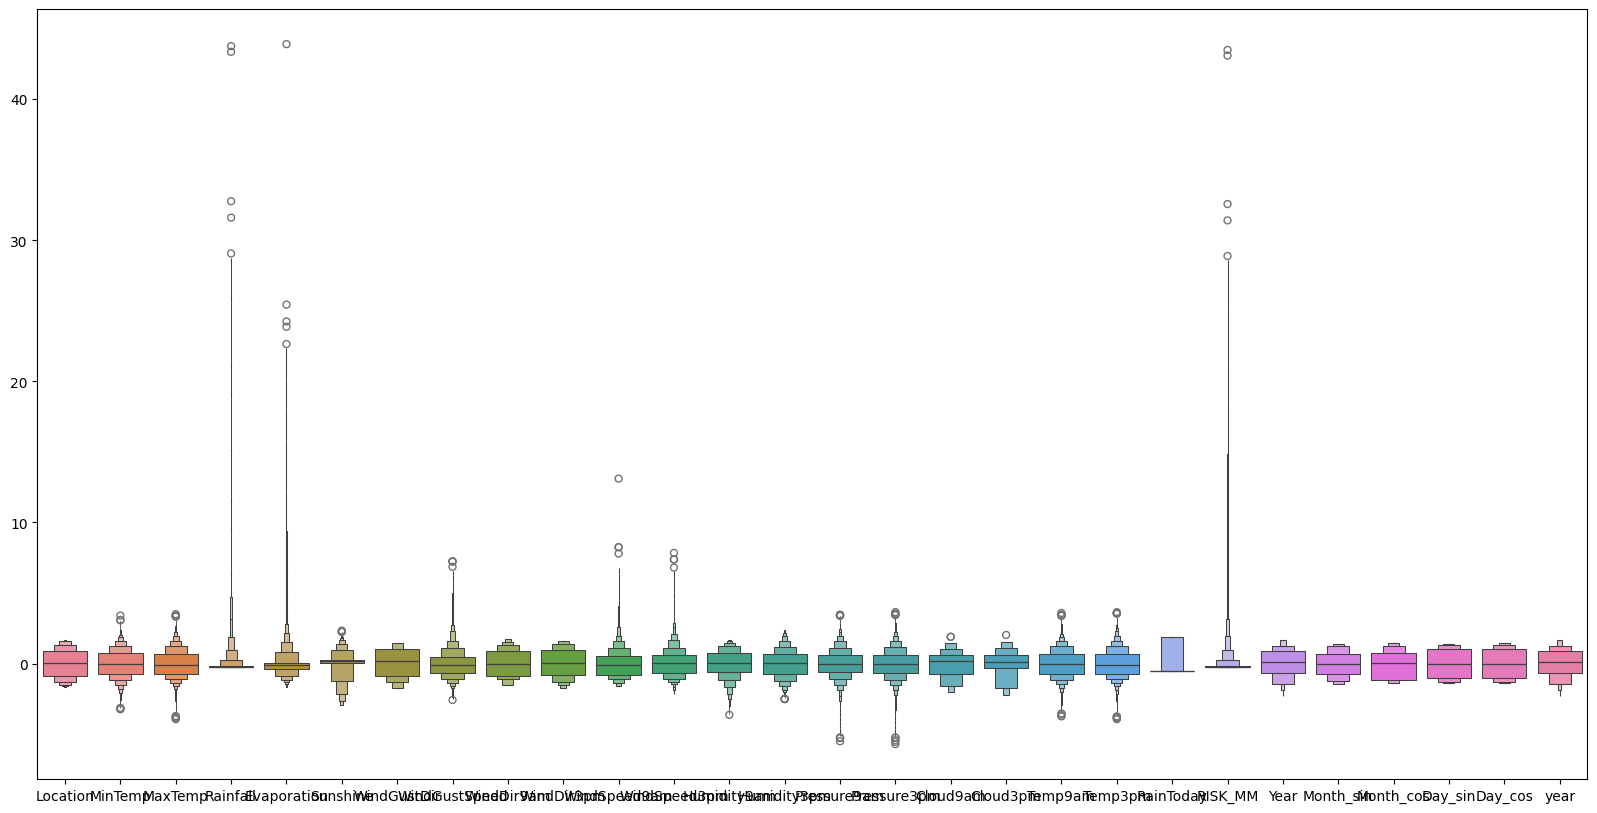

In [ ]:
#Detect the outlier
#show scaled values
plt.figure(figsize=(20,10))
sns.boxenplot(data=features)
plt.show()
#

In [ ]:
#Full Data
features['RainTomorrow']=target
features.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Temp3pm,RainToday,RISK_MM,Year,Month_sin,Month_cos,Day_sin,Day_cos,year,RainTomorrow
0,-1.527004,0.190085,-0.045764,-0.204920,-0.120303,0.16528,1.052556,0.310479,1.328933,1.366277,...,0.018050,-0.532962,-0.278450,-1.872674,-0.015522,1.434209,0.279183,1.424824,-1.872674,0
1,-1.527004,-0.749042,0.263677,-0.276125,-0.120303,0.16528,1.265582,0.310479,-0.221571,1.586236,...,0.381886,-0.532962,-0.278450,-1.872674,-0.015522,1.434209,0.549895,1.338386,-1.872674,0
2,-1.527004,0.111824,0.348070,-0.276125,-0.120303,0.16528,1.478609,0.462679,1.328933,1.586236,...,0.221798,-0.532962,-0.278450,-1.872674,-0.015522,1.434209,0.797968,1.198260,-1.872674,0
3,-1.527004,-0.467304,0.671577,-0.276125,-0.120303,0.16528,-0.864683,-1.211523,0.442931,-1.713146,...,0.702062,-0.532962,-0.160497,-1.872674,-0.015522,1.434209,1.013246,1.010182,-1.872674,0
4,-1.527004,0.831821,1.276393,-0.157450,-0.120303,0.16528,1.052556,0.082179,-1.329073,-0.173434,...,1.167773,-0.532962,-0.254859,-1.872674,-0.015522,1.434209,1.186915,0.781853,-1.872674,0


In [ ]:
features.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Temp3pm,RainToday,RISK_MM,Year,Month_sin,Month_cos,Day_sin,Day_cos,year,RainTomorrow
count,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,...,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,142193.000000
mean,2.398575e-17,3.166118e-16,3.421966e-16,8.594892e-17,-1.071363e-16,7.259686e-16,-1.471126e-16,1.778943e-16,-5.756579e-17,3.837719e-17,...,4.797149e-17,-1.207283e-16,-2.818325e-17,-3.597222e-14,3.727785e-17,-3.417969e-17,1.746462e-17,-1.051875e-17,-3.597222e-14,0.224181
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,...,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,0.417043
min,-1.667479e+00,-3.237728e+00,-3.941909e+00,-2.761249e-01,-1.627183e+00,-2.903725e+00,-1.716789e+00,-2.581325e+00,-1.550574e+00,-1.713146e+00,...,-3.940491e+00,-5.329623e-01,-2.784499e-01,-2.266181e+00,-1.433538e+00,-1.387770e+00,-1.403521e+00,-1.392703e+00,-2.266181e+00,0.000000
25%,-8.948690e-01,-7.177378e-01,-7.490394e-01,-2.761249e-01,-3.714499e-01,5.696207e-02,-8.646832e-01,-6.788223e-01,-8.860721e-01,-8.333106e-01,...,-7.241768e-01,-5.329623e-01,-2.784499e-01,-6.921509e-01,-7.245296e-01,-1.198734e+00,-1.019416e+00,-1.055765e+00,-6.921509e-01,0.000000
50%,1.821567e-02,-2.904480e-02,-8.796072e-02,-2.761249e-01,-1.203033e-01,1.652799e-01,2.004496e-01,-7.002143e-02,-7.009855e-05,4.652466e-02,...,-8.382458e-02,-5.329623e-01,-2.784499e-01,9.486436e-02,-1.552162e-02,2.321940e-02,-3.084686e-03,-4.527237e-02,9.486436e-02,0.000000
75%,8.610630e-01,7.222567e-01,6.997076e-01,-2.049201e-01,6.805667e-02,2.374917e-01,1.052556e+00,4.626793e-01,8.859319e-01,9.263599e-01,...,6.729553e-01,-5.329623e-01,-1.840874e-01,8.818796e-01,6.934864e-01,7.287143e-01,1.013246e+00,1.010182e+00,8.818796e-01,0.000000
max,1.703910e+00,3.398768e+00,3.498743e+00,4.375219e+01,4.389314e+01,2.331636e+00,1.478609e+00,7.235589e+00,1.771934e+00,1.586236e+00,...,3.641861e+00,1.876305e+00,4.348218e+01,1.668895e+00,1.402494e+00,1.434209e+00,1.397352e+00,1.454036e+00,1.668895e+00,1.000000


In [ ]:
#Drop the outlier
features=features[(features["MinTemp"]<3.39)&(features["MinTemp"]>-3.23)]
features=features[(features["MaxTemp"]<2.3)&(features["MaxTemp"]>-2)]
features=features[(features["Rainfall"]<4.5)]
features=features[(features["Evaporation"]<2.8)]
features=features[(features["Sunshine"]<4.5)]
features=features[(features["WindGustSpeed"]<4)&(features["WindGustSpeed"]>-4)]
features=features[(features["WindSpeed9am"]<4)]
features=features[(features["WindSpeed3pm"]<2.5)]
features=features[(features["Humidity9am"]>-3)]
features=features[(features["Humidity3pm"]>2.2)]
features=features[(features["Pressure9am"]<2)&(features["Pressure9am"]>-2.7)]
features=features[(features["Pressure3pm"]<2)&(features["Pressure3pm"]>-2.7)]
features=features[(features["Cloud9am"]<1.8)]
features=features[(features["Cloud3pm"]<2)]
features=features[(features["Temp9am"]<2.3)&(features["Temp9am"]>-2)]
features=features[(features["Temp3pm"]<2.3)&(features["Temp3pm"]>-2)]
features=features[(features["RISK_MM"]<4.34)&(features["RISK_MM"]>-2.78)]
features.shape



(1092, 29)

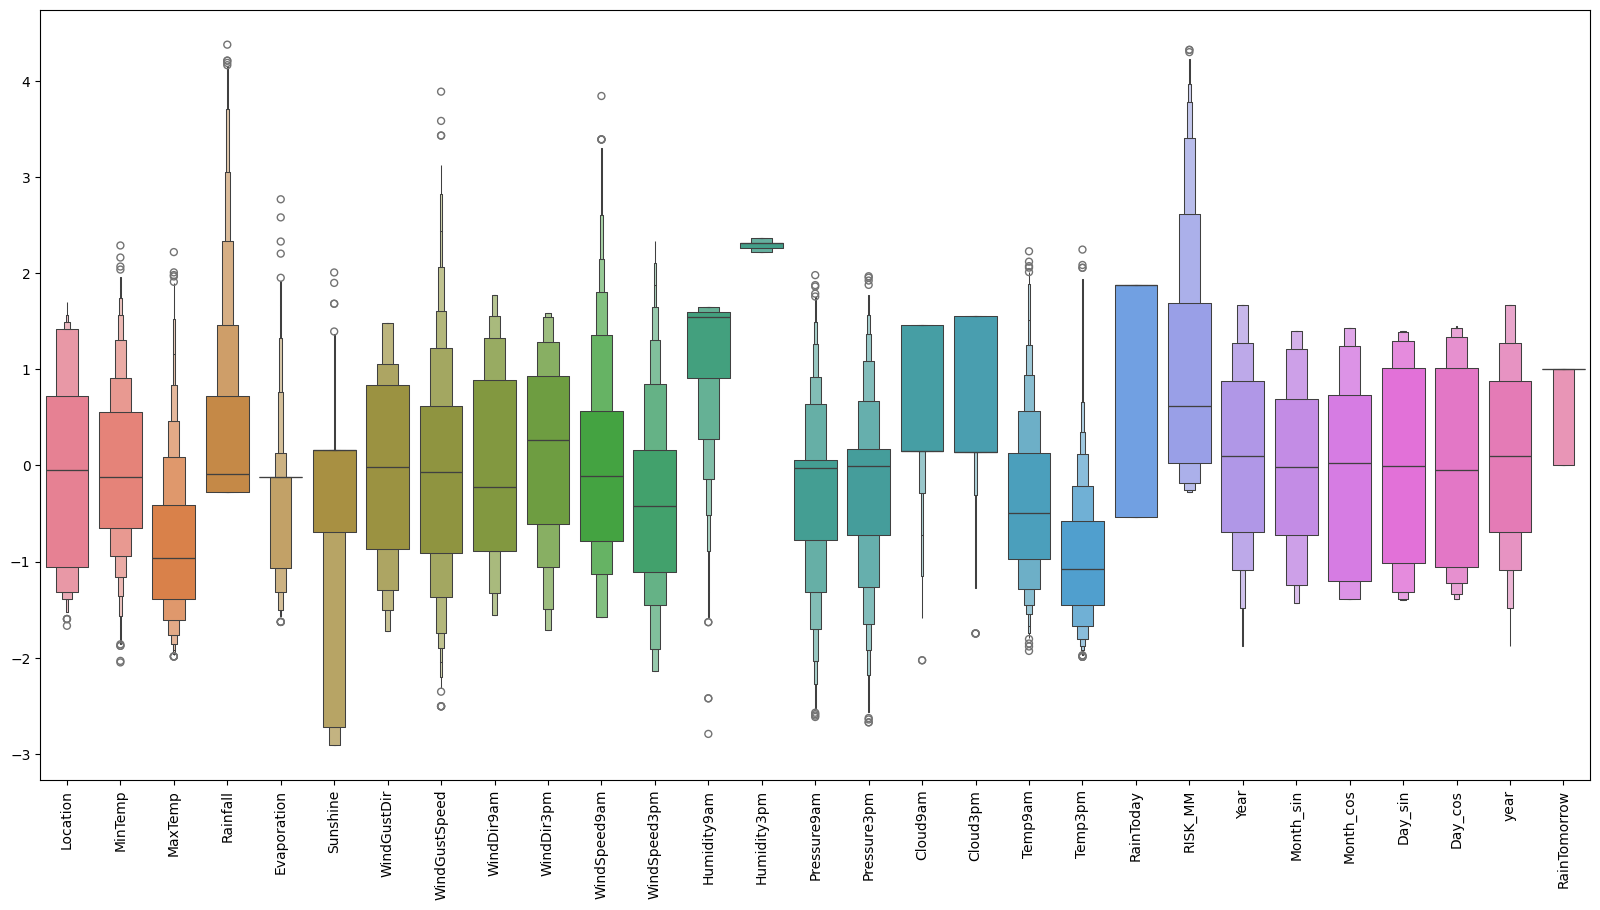

In [ ]:
#Show  scaled featrues without Outlier
plt.figure(figsize=(20,10))
sns.boxenplot(data=features)
plt.xticks(rotation=90)
plt.show()


**Model Building**

Spliting test and training sets

Initilising neural network

defining layers

compiling neural network

train the neural network



In [ ]:
X=features.drop('RainTomorrow',axis=1)
y=features['RainTomorrow']

In [ ]:
#Splitting
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X.shape

(1092, 28)

In [ ]:
#Early Stopping

early_Stopping=callbacks.EarlyStopping(min_delta=0.001,patience=20,restore_best_weights=True)

#Initilizing
model=Sequential()

#Layers


model.add(Dense(units=32,kernel_initializer='normal',activation='relu',input_dim=28))

model.add(Dense(units=32,kernel_initializer='uniform',activation='relu'))
model.add(Dense(units=16,kernel_initializer='uniform',activation='relu'))
model.add(Dense(units=8,kernel_initializer='uniform',activation='relu'))

model.add(Dropout(0.25))
model.add(Dense(units=8,kernel_initializer='uniform',activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))

#Compiling
# opt=Adam(learning_rate=0.00009)
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


#Train the ANN
history=model.fit(X_train,y_train,batch_size=32,epochs=150,callbacks=[early_Stopping],validation_split=0.2)


Epoch 1/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7404 - loss: 0.6913 - val_accuracy: 0.8857 - val_loss: 0.6847
Epoch 2/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8508 - loss: 0.6835 - val_accuracy: 0.8857 - val_loss: 0.6756
Epoch 3/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8581 - loss: 0.6748 - val_accuracy: 0.8857 - val_loss: 0.6652
Epoch 4/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8315 - loss: 0.6655 - val_accuracy: 0.8857 - val_loss: 0.6346
Epoch 5/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8502 - loss: 0.6159 - val_accuracy: 0.8857 - val_loss: 0.4352
Epoch 6/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8397 - loss: 0.5100 - val_accuracy: 0.8857 - val_loss: 0.3409
Epoch 7/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8457 - loss: 0.4490 - val_accuracy: 0.8857 - val_loss: 0.3255
Epoch 8/150
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8422 - loss: 0.4145 - val_accuracy: 0.8857 - 

<Axes: >

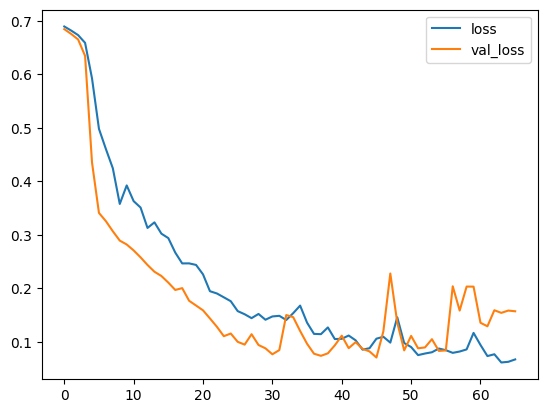

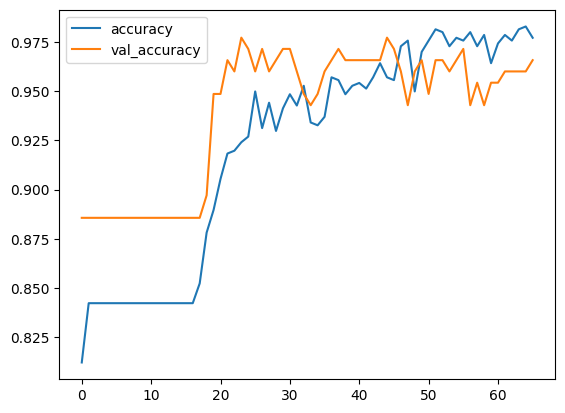

In [ ]:
history_df=pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot()
history_df.loc[:,['accuracy','val_accuracy']].plot()
#

**Conclusion**

In [ ]:
#predicting the result
y_pred=model.predict(X_test)
y_pred=(y_pred>0.5)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [ ]:
#Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 31,   2],
       [  3, 183]])

<Axes: >

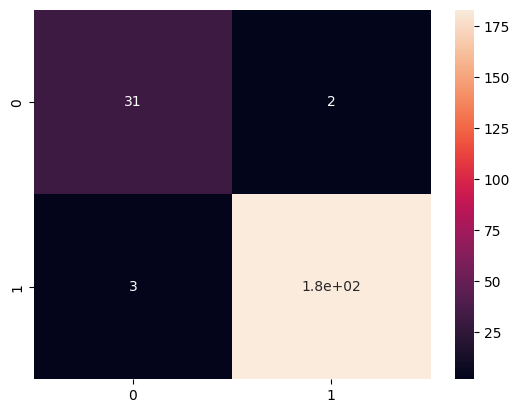

In [ ]:
sns.heatmap(cm,annot=True)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93        33
           1       0.99      0.98      0.99       186

    accuracy                           0.98       219
   macro avg       0.95      0.96      0.96       219
weighted avg       0.98      0.98      0.98       219

